(6330, 40)
             0         1         2         3         4         5
1806 -0.007776  1.036134  0.328366  0.852653 -0.934266 -0.832389
1326  0.009886  1.026229  0.271673  0.230288 -0.349696  0.391516
5619  0.043968  1.021806  0.216870 -0.340243  0.357934 -0.013811
2835  0.000511  1.037419  0.307697 -0.978780  0.494787  0.484846
5755  0.095363  0.899979  0.270413  0.535130  0.177531  0.400724
...        ...       ...       ...       ...       ...       ...
5793 -0.014775  1.049422  0.323281  0.566003  0.424207  0.001163
583   0.113714  1.025744  0.192213  0.179458 -0.242303 -0.120638
4110  0.004564  1.038372  0.307721  0.043225  0.126374 -0.274337
4970  0.139997  1.066747  0.284707 -0.335160  0.026557 -0.008712
1129 -0.007510  1.088686  0.189069 -0.051961 -0.220516  0.408458

[3856 rows x 6 columns]
             0         1         2
1806  0.091624  0.988323  0.276844
1326  0.038425  1.002916  0.311913
5619 -0.000628  1.053683  0.217596
2835 -0.112109  1.063410  0.337201
5755  0.1

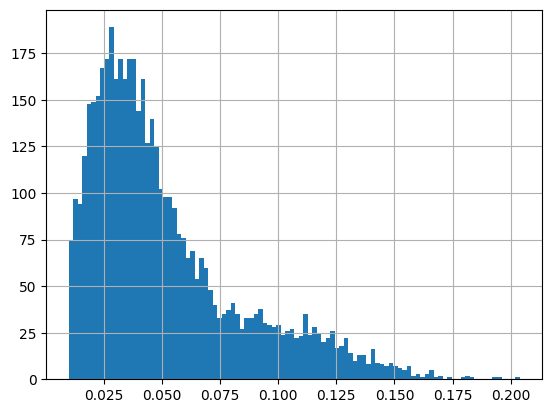

In [3]:
import pandas as pd

df = pd.read_csv('data.csv', header=None)

# print shape of the dataframe
print(df.shape)

# 0-11: obs
# 12-14: achieved_goal
# 15-17: desired_goal
# 18-20: action
# 21: reward
# 22-33: next_obs
# 34-36: next_achieved_goal
# 37-39: next_desired_goal

# make last column to be the distance between obs and next_obs
df[40] = ((df[0] - df[22])**2 + (df[1] - df[23])**2 + (df[2] - df[24])**2)**0.5

# make last column to be the distance between desired_goal and next_desired_goal
df[41] = ((df[15] - df[37])**2 + (df[16] - df[38])**2 + (df[17] - df[39])**2)**0.5

# remove rows that has distance < 0.01
df = df[df[40] > 0.01]
df = df[df[40] < 0.075]

# remove rows that has distance > 0.1
df = df[df[41] < 0.1]

# plot the distribution of column 37
df[40].hist(bins=100)

# plot the distribution of column 38
df[41].hist(bins=100)

grip_pos = df[[0, 1, 2]]
grip_pos_next = df[[22, 23, 24]].rename(columns={22: 0, 23: 1, 24: 2})
action = df[[18, 19, 20]].rename(columns={18: 3, 19: 4, 20: 5})

# seperate the data into training and testing
from sklearn.model_selection import train_test_split
grip_pos_train, grip_pos_test, grip_pos_next_train, grip_pos_next_test, action_train, action_test = train_test_split(grip_pos, grip_pos_next, action, test_size=0.2, random_state=42)

# # use linear regression to predict the next grip position
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression().fit(grip_pos_train.join(action_train), grip_pos_next_train)

#use MLP to predict the next grip position
# from sklearn.neural_network import MLPRegressor
# reg1 = MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=42, verbose=True, tol=0.000001).fit(grip_pos_train.join(action_train), grip_pos_next_train)

print(grip_pos_train.join(action_train))
print(grip_pos_next_train)

# print the score
print(reg1.score(grip_pos_test.join(action_test), grip_pos_next_test))

pred = reg1.predict(grip_pos_test.join(action_test))
actual = grip_pos_next_test

# reset index of actual to 0 to len(actual)
actual = actual.reset_index(drop=True)

          0         1         2
0  0.151516  1.043148  0.163246
1  0.131868  0.985250  0.310272
2  0.055717  1.041289  0.329439
3 -0.007343  1.053107  0.347506
4  0.000974  1.037453  0.307698
5  0.164786  1.069549  0.250566
6 -0.012418  1.089712  0.185565
7 -0.121593  1.065974  0.266950
8 -0.054945  1.030748  0.309108
9 -0.022960  1.047564  0.207044
          0         1         2
0  0.154608  1.038938  0.162611
1  0.125630  0.984631  0.322178
2  0.052423  1.046891  0.327184
3 -0.011415  1.048717  0.350331
4 -0.056348  1.005662  0.355502
5  0.175662  1.048057  0.241739
6  0.005118  1.078000  0.181618
7 -0.118115  1.068559  0.263316
8 -0.061172  1.024642  0.305833
9 -0.021781  1.045524  0.216164


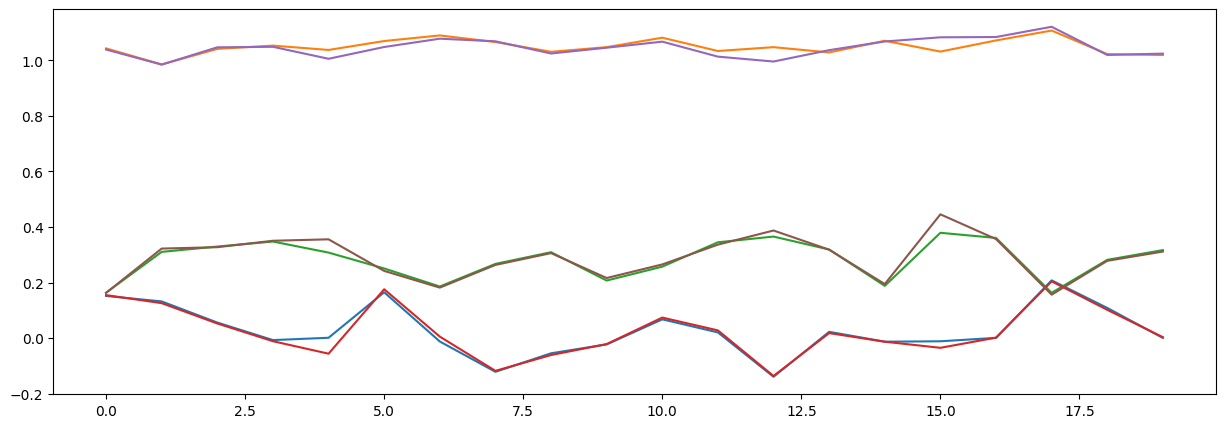

In [2]:
print(actual.head(10))
print(pd.DataFrame(pred).head(10))

# plot the results
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(actual[:20], label='actual')
plt.plot(pred[:20], label='pred')

             0         1         2         3         4         5
1630  0.064603  1.009649  0.388444  0.029717 -0.023033  0.016959
2553 -0.005065  1.045630  0.391517 -0.002476 -0.008037  0.040415
3110 -0.034135  0.515306  0.661545 -0.093306 -0.685917  0.420361
5460  0.008996  1.014570  0.390093 -0.012006 -0.015728  0.019175
5036  0.063696  1.005018  0.389849 -0.017783 -0.038445  0.014391
...        ...       ...       ...       ...       ...       ...
1808 -0.042415  1.014131  0.389275 -0.002278  0.002179  0.010372
2055 -0.012460  1.013637  0.391347  0.004214 -0.005857  0.019173
1361 -0.105540  1.071009  0.390897 -0.029666  0.023461  0.006293
5520 -0.010097  1.017209  0.389302 -0.006465 -0.016744  0.019209
5023  0.156684  1.131820  0.490879  0.334576 -0.056513  0.749471

[3228 rows x 6 columns]
             0         1         2
1     0.001382  1.017226  0.389583
2     0.006079  1.018756  0.389583
4     0.005071  1.016740  0.389583
6     0.005352  1.006487  0.389583
9     0.013589  0.97

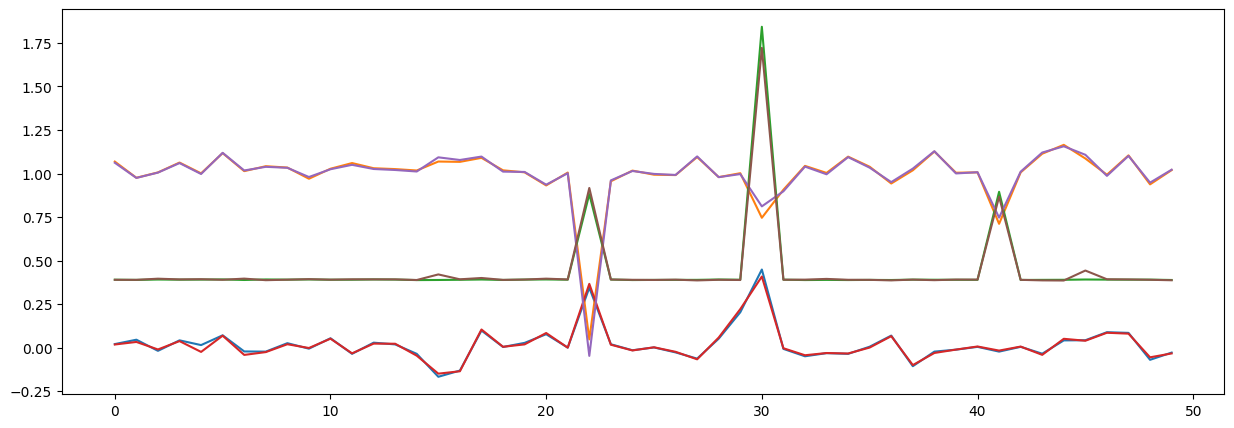

In [3]:
target_pos = df[[3, 4, 5]].rename(columns={3: 0, 4: 1, 5: 2})
target_pos_next = df[[25, 26, 27]].rename(columns={25: 0, 26: 1, 27: 2})
target_rel_vel = df[[9, 10, 11]].rename(columns={9: 3, 10: 4, 11: 5})

# seperate the data into training and testing
target_pos_train, target_pos_test, target_pos_next_train, target_pos_next_test, target_rel_vel_train, target_rel_vel_test = train_test_split(target_pos, target_pos_next, target_rel_vel, test_size=0.2, random_state=42)

# use linear regression to predict the next position of the target from the current position and relative velocity
reg2 = LinearRegression().fit(target_pos_train.join(target_rel_vel_train), target_pos_next_train)

print(target_pos_train.join(target_rel_vel_train))
print(target_pos_next)

# predict the next position of the target from the current position and relative velocity
target_pos_next_pred = reg2.predict(target_pos_test.join(target_rel_vel_test))
pred = target_pos_next_pred
actual = target_pos_next_test
actual = actual.reset_index(drop=True)

# plot the result
plt.figure(figsize=(15, 5))
plt.plot(actual[:50], label='actual')
plt.plot(pred[:50], label='pred')



grip_pos_min:  0   -0.272748
1    0.692320
2   -0.064259
dtype: float64
grip_pos_max:  0    0.380411
1    1.273924
2    0.501841
dtype: float64
action_min:  [-1.         -0.99719894 -1.        ]
action_max:  [1. 1. 1.]
grip_pos_random:                 0         1         2
0       0.098827  1.271465 -0.025645
1      -0.266190  0.799104  0.319281
2       0.005115  0.999986  0.232472
3       0.021696  1.227354 -0.042057
4      -0.096402  0.904975  0.296808
...          ...       ...       ...
255550  0.262606  0.742665  0.221996
255551 -0.175152  0.970104  0.197439
255552  0.268759  1.085693  0.444517
255553  0.256345  0.757874 -0.004347
255554 -0.091717  1.037955  0.355675

[255555 rows x 3 columns]
action_random:                 3         4         5
0       0.476325  0.245306 -0.572681
1      -0.854652 -0.488560 -0.816076
2      -0.068612  0.224498 -0.172455
3      -0.904561 -0.994007 -0.933675
4       0.485903  0.650553 -0.302348
...          ...       ...       ...
255550  0.565646 

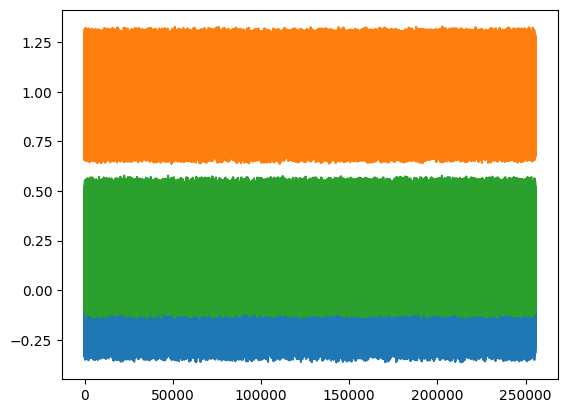

In [4]:
# get min max of grip_pos
grip_pos_min = grip_pos.min()
grip_pos_max = grip_pos.max()
action_min = action.min()
action_max = action.max()

# reshape action_min from (3, 1) to (3, )
action_min = action_min.values.reshape(3, )
action_max = action_max.values.reshape(3, )

print("grip_pos_min: ", grip_pos_min)
print("grip_pos_max: ", grip_pos_max)
print("action_min: ", action_min)
print("action_max: ", action_max)

import numpy as np

# generate random grip_pos 
grip_pos_random = np.random.uniform(grip_pos_min, grip_pos_max, size=(255555, 3))
grip_pos_random = pd.DataFrame(grip_pos_random)
print("grip_pos_random: ", grip_pos_random)

# generate random action
action_random = np.random.uniform(action_min, action_max, size=(255555, 3))
action_random = pd.DataFrame(action_random).rename(columns={0: 3, 1: 4, 2: 5})
print("action_random: ", action_random)

grip_pos_next = reg1.predict(grip_pos_random.join(action_random))

# plot grip_pos_next
fig = plt.figure()
plt.plot(grip_pos_next, label='grip_pos_next')


In [5]:
target_pos_min = target_pos.min()
target_pos_max = target_pos.max()
target_rel_vel_min = target_rel_vel.min()
target_rel_vel_max = target_rel_vel.max()

# print("target_pos_min: ", target_pos_min)
# print("target_pos_max: ", target_pos_max)
# print("target_rel_vel_min: ", target_rel_vel_min)
# print("target_rel_vel_max: ", target_rel_vel_max)

# seperate the data into training and testing

target_pos_random = np.random.uniform(target_pos_min, target_pos_max, (255555, 3))
target_pos_random = pd.DataFrame(target_pos_random)
print("target_pos_random: ", target_pos_random)

target_rel_vel_random = np.random.uniform(target_rel_vel_min, target_rel_vel_max, (255555, 3))
target_rel_vel_random = pd.DataFrame(target_rel_vel_random).rename(columns={0: 3, 1: 4, 2: 5})
print("target_rel_vel_random: ", target_rel_vel_random)

target_pos_next_pred = reg2.predict(target_pos_random.join(target_rel_vel_random))
pred = target_pos_next_pred

# plot the prediction
fig = plt.figure()
plt.plot(pred, label='target_pos_next_pred')


target_pos_random:                 0         1         2
0      -0.583828  2.485984  3.026357
1       0.036994  2.960823  1.084473
2       0.602727  1.233168  0.746594
3      -0.349552  2.972250  4.147842
4      -0.495703  0.989994  3.664610
...          ...       ...       ...
255550  0.983961  0.359931  3.843463
255551  0.587125  3.012967  1.904573
255552 -0.137476  0.341405  1.736074
255553 -0.737670  2.553806  5.261985
255554  0.531173  0.224610  0.642751

[255555 rows x 3 columns]
target_rel_vel_random:                 3         4         5
0      -0.491283  0.677150  0.739653
1      -0.409750  0.618676 -0.232336
2       0.354017  0.882704 -0.100391
3      -0.092560 -0.095770 -0.477980
4       0.020322 -0.079849 -0.476597
...          ...       ...       ...
255550 -0.072447  0.612529 -0.290304
255551  0.058002  0.767562 -0.139793
255552 -0.315868  0.460143 -0.167167
255553 -0.249777  0.559210  0.003784
255554  0.220294 -0.308860 -0.533704

[255555 rows x 3 columns]


In [ ]:
grip_pos_random = grip_pos_random.rename(columns={0: 0, 1: 1, 2: 2}).reset_index(drop=True)
target_pos_random = target_pos_random.rename(columns={0: 3, 1: 4, 2: 5}).reset_index(drop=True)
delta_pos = target_pos_random.rename(columns={3: 0, 4: 1, 5: 2}) - grip_pos_random
delta_pos = delta_pos.rename(columns={0: 6, 1: 7, 2: 8}).reset_index(drop=True)
target_rel_vel_random = target_rel_vel_random.rename(columns={3: 9, 4: 10, 5: 11}).reset_index(drop=True)
achieved_goal = grip_pos_random.rename(columns={0: 12, 1: 13, 2: 14})
goal = target_pos_random.rename(columns={3: 15, 4: 16, 5: 17})
action = action_random.rename(columns={3: 18, 4: 19, 5: 20})
grip_pos_next = pd.DataFrame(grip_pos_next).rename(columns={0: 22, 1: 23, 2: 24}).reset_index(drop=True)
target_pos_random_next = pd.DataFrame(target_pos_next_pred).rename(columns={0: 25, 1: 26, 2: 27}).reset_index(drop=True)
delta_pos_next = target_pos_random_next.rename(columns={25: 0, 26: 1, 27: 2}) - grip_pos_next.rename(columns={22: 0, 23: 1, 24: 2})
delta_pos_next = delta_pos_next.rename(columns={0: 28, 1: 29, 2: 30}).reset_index(drop=True)
target_rel_vel_random_next = target_rel_vel_random.rename(columns={3: 31, 4: 32, 5: 33}).reset_index(drop=True)
achieved_goal_next = grip_pos_next.rename(columns={22: 34, 23: 35, 24: 36})
REWARD_SCALE=10.0
reward = pd.DataFrame(-np.linalg.norm(delta_pos_next.to_numpy(), axis=-1)/REWARD_SCALE).rename(columns={0: 21})

# print(target_pos_random.rename(columns={3: 0, 4: 1, 5: 2}) - grip_pos_random)

new_data = pd.concat([grip_pos_random, target_pos_random, delta_pos, target_rel_vel_random, achieved_goal, goal, action, reward, grip_pos_next, target_pos_random_next, delta_pos_next, target_rel_vel_random_next, achieved_goal_next, target_pos_random_next], axis=1)
new_data = new_data.reset_index(drop=True).to_numpy()

#print 15 rows of new_data
print('reward')
print(new_data[:15, 21])

print('delta_pos_next')
print(delta_pos_next[:15])

# print generated observations
print('obs')
print(new_data[:15, 0:12])

# print generated actions
print('actions')
print(new_data[:15, 18:21])

# print generated next_obs
print('next_obs')
print(new_data[:15, 22:34])

old_data = df.reset_index(drop=True).to_numpy()
# remove columns 37 and 38
old_data = np.delete(old_data, [40, 41], axis=1)
# concat new data and old data
new_data = np.concatenate((old_data, new_data), axis=0)
# export to csv
np.savetxt("gen_data.csv", new_data, delimiter=",")

reward
[-0.18244462 -0.19985995 -0.21503062 -0.26631968 -0.19274003 -0.20402057
 -0.19147646 -0.2512609  -0.10164925 -0.34432264 -0.13855373 -0.10850258
 -0.12146187 -0.25438947 -0.13196161]
delta_pos_next
          28        29        30
0   0.153590 -0.343465  1.785230
1   0.165808  1.590770  1.198481
2  -0.847845  1.813188  0.785701
3   0.749526  1.030821  2.338426
4   0.348388  1.484633  1.178712
5   0.750895 -0.671333  1.774234
6  -1.446802  0.987457  0.773316
7  -0.296649  1.806087  1.721410
8   0.526171 -0.664657  0.560921
9   0.414991  1.094932  3.238011
10  0.586337  1.081017  0.638219
11 -0.211768 -0.252303  1.033817
12  0.232145 -1.182723  0.150247
13 -0.376205  1.789429  1.768562
14 -0.461266  0.403062  1.168829
obs
[[-2.47932294e-01  1.02841990e+00  3.77371189e-01 -1.37816892e-01
   7.24561147e-01  2.05768184e+00  1.10115402e-01 -3.03858748e-01
   1.68031065e+00  1.22941631e-01  8.14402771e-01 -3.77626799e-01]
 [ 1.08469701e-01  9.08894925e-01 -2.22484554e-03  3.17080632e-

In [ ]:
from torch.utils.tensorboard import SummaryWriter
from mpi_utils.normalizer import normalizer
import torch
from rl_modules.models import actor, critic
from mpi_utils.mpi_utils import sync_networks, sync_grads
from her_modules.her import her_sampler
from rl_modules.replay_buffer import replay_buffer

REWARD_SCALE = 10.0

def _goal_distance(goal_a, goal_b):
    assert goal_a.shape == goal_b.shape
    return np.linalg.norm(goal_a - goal_b, axis=-1)

def compute_reward(achieved_goal, desired_goal, info=None, reward_type="dense", max_reward=1.0):
    distance = _goal_distance(achieved_goal, desired_goal)
    if reward_type == "sparse":
        reward = (distance < 0.001).astype(np.float32) * max_reward # hard coded for now
        if info is not None:
            info = np.squeeze(info)
            assert reward.shape == info.shape
            reward[info > 0] = max_reward
        return reward
    else:
        reward = -distance.astype(np.float32)/REWARD_SCALE
        # reward[reward > -EPSILON] = self.max_reward # hard coded for now
        if info is not None:
            info = np.squeeze(info)
            assert reward.shape == info.shape
            reward[info > 0] = max_reward
        return reward
    
def _preproc_og(o, g):
    o = np.clip(o, -200, 200)
    g = np.clip(g, -200, 200)
    return o, g
    
def _update_network(transitions, 
                    o_norm_, 
                    g_norm_, 
                    actor_optim, 
                    critic_optim, 
                    actor_network, 
                    critic_network, 
                    actor_target_network, 
                    critic_target_network,
                    i,
                    cuda=False):
    # pre-process the observation and goal
    o, o_next, g, g_next = transitions['obs'], transitions['obs_next'], transitions['g'], transitions['g_next']
    transitions['obs'], transitions['g'] = _preproc_og(o, g)
    transitions['obs_next'], transitions['g_next'] = _preproc_og(o_next, g_next)

    # start to do the update
    obs_norm = o_norm_.normalize(transitions['obs'])
    g_norm = g_norm_.normalize(transitions['g'])
    inputs_norm = np.concatenate([obs_norm, g_norm], axis=1)
    obs_next_norm = o_norm_.normalize(transitions['obs_next'])
    g_next_norm = g_norm_.normalize(transitions['g_next'])
    inputs_next_norm = np.concatenate([obs_next_norm, g_next_norm], axis=1)

    if i%20 == 0:
        print('---> with i = ', i)
        print('-> before normalization')
        print('obs: ', o[:4])
        print('g: ', g[:4])
        print('obs_next: ', o_next[:4])
        print('g_next: ', g_next[:4])
        print('-> after normalization')
        print('obs_norm: ', obs_norm[:4])
        print('g_norm: ', g_norm[:4])
        print('obs_next_norm: ', obs_next_norm[:4])
        print('g_next_norm: ', g_next_norm[:4])

    # transfer them into the tensor
    inputs_norm_tensor = torch.tensor(inputs_norm, dtype=torch.float32)
    inputs_next_norm_tensor = torch.tensor(inputs_next_norm, dtype=torch.float32)
    actions_tensor = torch.tensor(transitions['actions'], dtype=torch.float32)
    r_tensor = torch.tensor(transitions['r'], dtype=torch.float32) 

    if cuda:
        inputs_norm_tensor = inputs_norm_tensor.cuda()
        inputs_next_norm_tensor = inputs_next_norm_tensor.cuda()
        actions_tensor = actions_tensor.cuda()
        r_tensor = r_tensor.cuda()

    # calculate the target Q value function
    with torch.no_grad():

        # do the normalization
        # concatenate the stuffs
        # actions_next = actor_target_network(inputs_next_norm_tensor)
        # q_next_value = critic_target_network(inputs_next_norm_tensor, actions_next)
        # q_next_value = q_next_value.detach()
        gamma = 0.98
        # target_q_value = r_tensor + gamma * q_next_value
        target_q_value = r_tensor
        target_q_value = target_q_value.detach()

        # clip the q value
        clip_return = 1 / (1 - gamma)
        target_q_value = torch.clamp(target_q_value, -clip_return, 0)

    # the q loss
    real_q_value = critic_network(inputs_norm_tensor, actions_tensor)
    critic_loss = (target_q_value - real_q_value).pow(2).mean()

    if i%20 == 0:
        print('target_q_value  (r_tensor): ', r_tensor[:4], ', real_q_value: ', real_q_value[:4])

    # the actor loss
    actions_real = actor_network(inputs_norm_tensor)
    actor_loss = -critic_network(inputs_norm_tensor, actions_real).mean()
    # action_l2 = 1
    # action_max = 1
    # actor_loss += action_l2 * (actions_real / action_max).pow(2).mean()

    if i%20 == 0:
        print('actions_real: ', actions_real[:4])

    # start to update the network
    actor_optim.zero_grad()
    actor_loss.backward()
    sync_grads(actor_network)
    actor_optim.step()

    # update the critic_network
    critic_optim.zero_grad()
    critic_loss.backward()
    sync_grads(critic_network)
    critic_optim.step()

    # print('actor_loss: ', actor_loss.item(), 'critic_loss: ', critic_loss.item(), end='\r')
    return actor_loss.item(), critic_loss.item()

# update the normalizer
def _update_normalizer(transitions, o_norm, g_norm):
    mb_obs, mb_ag, mb_g, mb_actions, mb_rewards, mb_obs_next, mb_ag_next, mb_g_next = transitions

    # create the new buffer to store them
    transitions = {'obs': mb_obs, 
                    'ag': mb_ag,
                    'g': mb_g, 
                    'actions': mb_actions, 
                    'obs_next': mb_obs_next,
                    'ag_next': mb_ag_next,
                    'g_next': mb_g_next,
                    'r': mb_rewards
                    }
    
    obs, g = transitions['obs'], transitions['g']
    obs_next, g_next = transitions['obs_next'], transitions['g_next']

    # pre process the obs and g
    transitions['obs'], transitions['g'] = _preproc_og(obs, g)

    # pre process the obs_next and g_next
    transitions['obs_next'], transitions['g_next'] = _preproc_og(obs_next, g_next)

    # update
    o_norm.update(transitions['obs'])
    g_norm.update(transitions['g'])
    o_norm.update(transitions['obs_next'])
    g_norm.update(transitions['g_next'])

    # recompute the stats
    o_norm.recompute_stats()
    g_norm.recompute_stats()

def _soft_update_target_network(target, source, polyak):
    for target_param, param in zip(target.parameters(), source.parameters()):
        target_param.data.copy_((1 - polyak) * param.data + polyak * target_param.data)

def sample_her_transitions(transitions, replay_k):
    future_p = 1 - (1. / (1 + replay_k))
    rollout_batch_size = transitions['actions'].shape[0]

    # her idx
    her_indexes = np.where(np.random.uniform(size=rollout_batch_size) < future_p)

    # replace goal with achieved goal
    future_ag = transitions['ag'][her_indexes]
    transitions['g'][her_indexes] = future_ag
    transitions['g_next'][her_indexes] = future_ag

    # to get the params to re-compute reward
    transitions['r'] = np.expand_dims(compute_reward(transitions['ag_next'], transitions['g_next'], None), 1)
    transitions = {k: transitions[k].reshape(rollout_batch_size, *transitions[k].shape[1:]) for k in transitions.keys()}

    return transitions

writer = SummaryWriter()

# create the normalizer
o_norm = normalizer(size=12, default_clip_range=5)
g_norm = normalizer(size=3, default_clip_range=5)

env_params = {
    'obs': 12,
    'goal': 3,
    'action': 3,
    'action_max': 1, 
    'max_timesteps': 25
}

# create the network
actor_network = actor(env_params)
critic_network = critic(env_params)

model_path = 'saved_models/UnderwaterEnv/model_default_epoch41_2023-08-26-10-02-11.pt'

o_mean, o_std, g_mean, g_std, actor_model, critic_model = torch.load(model_path, map_location=lambda storage, loc: storage)
o_norm.mean = o_mean
o_norm.std = o_std
g_norm.mean = g_mean
g_norm.std = g_std
actor_network.load_state_dict(actor_model)
critic_network.load_state_dict(critic_model)

sync_networks(actor_network)
sync_networks(critic_network)

# build up the target network
actor_target_network = actor(env_params)
critic_target_network = critic(env_params)

# if use gpu
actor_network.cuda()
critic_network.cuda()
actor_target_network.cuda()
critic_target_network.cuda()

# load the weights into the target networks
actor_target_network.load_state_dict(actor_network.state_dict())
critic_target_network.load_state_dict(critic_network.state_dict())

actor_optim = torch.optim.Adam(actor_network.parameters(), lr=0.001)
critic_optim = torch.optim.Adam(critic_network.parameters(), lr=0.001)

# obs, ag, g, actions, rewards, obs_next, ag_next
transitions = [new_data[:, 0:12], 
               new_data[:, 12:15], 
               new_data[:, 15:18], 
               new_data[:, 18:21], 
               new_data[:, 21:22], 
               new_data[:, 22:34], 
               new_data[:, 34:37],
               new_data[:, 37:40]]

_update_normalizer(transitions, o_norm, g_norm)

mb_obs, mb_ag, mb_g, mb_actions, mb_rewards, mb_obs_next, mb_ag_next, mb_g_next = transitions

transitions = {'obs': mb_obs, 
                'ag': mb_ag,
                'g': mb_g, 
                'actions': mb_actions, 
                'obs_next': mb_obs_next,
                'ag_next': mb_ag_next,
                'g_next': mb_g_next,
                'r': mb_rewards
                }

# her sampler
# transitions = sample_her_transitions(transitions, 2)

writer = SummaryWriter()
n_batches = 10000
for i in range(n_batches):
    actor_loss, critic_loss = _update_network(transitions, 
                                              o_norm, 
                                              g_norm, 
                                              actor_optim, 
                                              critic_optim, 
                                              actor_network, 
                                              critic_network, 
                                              actor_target_network, 
                                              critic_target_network,
                                              i,
                                              cuda=True)
    writer.add_scalar('actor_loss', actor_loss, i)
    writer.add_scalar('critic_loss', critic_loss, i)
    _soft_update_target_network(actor_target_network, actor_network, 0.01)
    _soft_update_target_network(critic_target_network, critic_network, 0.01)
    print('batch: ', i, ' actor_loss: ', actor_loss, ' critic_loss: ', critic_loss, end='\r')
    

/home/khiem/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-26 19:29:52.863518: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/khiem/miniconda3/lib/:/home/khiem/miniconda3/lib/
2023-08-26 19:29:52.863740: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/khiem/miniconda3/lib/:/home/khiem/miniconda3/lib/
2023-08-26 19:29:52.863762: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: C

---> with i =  0
-> before normalization
obs:  [[ 0.11845589  1.06622791  0.26689953 -0.00337579  1.01669633  0.3895826
  -0.12183168 -0.04953158  0.12268308  0.12302905 -0.05231395  0.00597368]
 [ 0.10269233  1.07811856  0.25950855  0.00138166  1.01722634  0.3895826
  -0.10131067 -0.06089222  0.13007405  0.04154824 -0.09115822  0.07767981]
 [ 0.08762034  1.04618073  0.2930907   0.0068996   1.01822054  0.3895826
  -0.08072074 -0.02796018  0.0964919   0.0051654  -0.0195103   0.02986401]
 [ 0.09425674  1.03389931  0.28191781  0.00346652  1.01329958  0.3895826
  -0.09079023 -0.02059972  0.10766479  0.00775347 -0.02354849  0.0200007 ]]
g:  [[-0.00337579  1.01669633  0.3895826 ]
 [ 0.00138166  1.01722634  0.3895826 ]
 [ 0.0068996   1.01822054  0.3895826 ]
 [ 0.00346652  1.01329958  0.3895826 ]]
obs_next:  [[ 0.10269233  1.07811856  0.25950855  0.00138166  1.01722634  0.3895826
  -0.10131067 -0.06089222  0.13007405  0.04154824 -0.09115822  0.07767981]
 [ 0.08735173  1.04735661  0.29274386  0

In [ ]:
from datetime import datetime

date = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
training_label = 'default'
model_path = 'saved_models/RefinedUnderwaterEnv'
torch.save([o_norm.mean, o_norm.std, g_norm.mean, g_norm.std, actor_network.state_dict(), critic_network.state_dict()], \
            model_path + f'/model_{training_label}_{date}.pt')